In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from IPython.display import display


In [89]:
dfr = pd.read_csv(
    r"C:\Users\LENOVO\Desktop\Datasets\title.ratings.tsv", ## rating data
    sep='\t'
)

dfb = pd.read_csv(
    r"C:\Users\LENOVO\Desktop\Datasets\title.basics.tsv",  ## movies data
    sep='\t',
    na_values='\\N'
)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11244\4137677900.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfb = pd.read_csv(


In [90]:
dfr.info()
dfr.describe(include='all')
dfr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582149 entries, 0 to 1582148
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1582149 non-null  object 
 1   averageRating  1582149 non-null  float64
 2   numVotes       1582149 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.2+ MB


tconst  averageRating  numVotes
0  tt0000001            5.7      2164
1  tt0000002            5.5       296
2  tt0000003            6.5      2217
3  tt0000004            5.3       190
4  tt0000005            6.2      2955

In [91]:
## حجم الداتا الافلام

dfb.shape

(11738479, 9)

In [92]:
## حجم داتا التقييم
dfr.shape

(1582149, 3)

In [93]:
dfr.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [94]:
dfb.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [95]:
columns_to_check = [
    'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
    'startYear', 'endYear', 'runtimeMinutes', 'genres'
]

print(dfb[columns_to_check].nunique())


tconst            11738479
titleType               11
primaryTitle       5286967
originalTitle      5312559
isAdult                 37
startYear              152
endYear                 99
runtimeMinutes        1489
genres                2381
dtype: int64


In [96]:
print(dfb.isna().sum())


tconst                   0
titleType                0
primaryTitle            20
originalTitle           20
isAdult                  1
startYear          1434646
endYear           11595679
runtimeMinutes     7865275
genres              520928
dtype: int64


In [97]:
for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(dfb[col].dropna().unique())



Column: tconst
['tt0000001' 'tt0000002' 'tt0000003' ... 'tt9916852' 'tt9916856'
 'tt9916880']

Column: titleType
['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Column: primaryTitle
['Carmencita' 'Le clown et ses chiens' 'Poor Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: originalTitle
['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: isAdult
[0.000e+00 1.000e+00 2.019e+03 1.981e+03 2.020e+03 2.017e+03 2.023e+03
 2.022e+03 2.011e+03 1.977e+03 1.978e+03 1.979e+03 1.966e+03 1.970e+03
 1.971e+03 1.972e+03 1.973e+03 1.974e+03 1.975e+03 1.988e+03 1.980e+03
 1.987e+03 1.986e+03 1.982e+03 1.985e+03 1.983e+03 1.984e+03 1.976e+03
 1.968e+03 1.969e+03 2.024e+03 1.967e+03 1.965e+03 1.958e+03 2.025e+03
 2.014e+03 2.005e+03]

Column: startYear
[1894. 1892. 1893. 1895. 1896. 1898. 1897. 

In [98]:
## عامودين ما بيلزمو
dfb = dfb.drop(columns=['isAdult', 'endYear'])


In [99]:
## فلترت انو بس بدي الافلام
dfb = dfb[dfb['titleType'] == 'movie'].reset_index(drop=True)

In [100]:
## عم طابق يلي موجود بالداتا التانية
dfb = dfb[dfb['tconst'].isin(dfr['tconst'])].reset_index(drop=True)


In [101]:
## عم شوف اذا في تكرار
dfb['tconst'].duplicated().sum()

0

In [102]:
dfb.shape

(331560, 7)

In [103]:
## 'primaryTitle' is in english
## 'originalTitle' in the original lang
## عم شوف الاختلاف بالمسمى
dfb['title_diff'] = dfb['primaryTitle'] != dfb['originalTitle']
print(dfb['title_diff'].value_counts())


title_diff
False    258908
True      72652
Name: count, dtype: int64


In [104]:
## عم شوف يلي مو انكليزي
non_english_titles = dfb[
    (dfb['primaryTitle'] != dfb['originalTitle']) &
    (dfb['originalTitle'].str.contains(r"[éèêëàâîïôùûç]", flags=re.IGNORECASE, na=False) |
     dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))
]

non_english_titles[['primaryTitle', 'originalTitle']]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11244\4148407487.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))


primaryTitle  \
4                                        The Prodigal Son   
23                                            The Red Inn   
25                                                Camille   
42                                        The Four Devils   
47                   Les Misérables, Part 1: Jean Valjean   
57                           Anny - Story of a Prostitute   
61                                        Dante's Inferno   
79                                       Saved in Mid-Air   
80                                      The Last Bohemian   
94                                      The Black Diamond   
98              Fantômas: In the Shadow of the Guillotine   
110                            Fantomas: The Man in Black   
111                                      Love Everlasting   
113                                           War Is Hell   
115                       Les Misérables, Part 2: Fantine   
116                     Fantômas: The Dead Man Who Killed   
120                                         Captive Souls   
191                                    The Child of Paris   
196                 Fantomas: The Mysterious Finger Print   
197                        Fantômas: The False Magistrate   
199                                               Loyalty   
223                                   The Borrowed Babies   
252                                       The Naked Truth   
266                                   The Reign of Terror   
299                                 Prisoner of the Night   
387                                  The Heroism of Paddy   
415                                      Madame de Thebes   
449                                        Queen Margaret   
463                                               Camille   
642                                     A Night of Horror   
747                                          Peace's Road   
777                                         Peach Blossom   
825                                     A Penny's History   
858                                     Mothers of France   
861                              The New Mission of Judex   
954                                     The Zone of Death   
957                                The Last Indian Attack   
1010                                   The Tenth Symphony   
1204                           The Picture of Dorian Gray   
1214                                The Call of the Blood   
1219                                  The Grey Automobile   
1317                                  Eyes Without a Face   
1332                          The Cabinet of Dr. Caligari   
1380                                            The Other   
1385                                      The Little Cafe   
1482                                     Missing Husbands   
1532                                             Fantomas   
1540                                       Spanish Fiesta   
1566                         The Swallow and the Titmouse   
1569                                       Man of the Sea   
1715                                  Tillers of the Soil   
1724                                    Love of Perdition   
1814                    Mysteries of India, Part I: Truth   
1831                                  Labyrinth of Horror   
1890                                    Souls on the Road   
1935                                       Give Me My Son   
1952                                        The Scarecrow   
2014                               The Woman from Nowhere   
2098                      Nosferatu: A Symphony of Horror   
2182                                 The Loves of Pharaoh   
2206                                          The Red Inn   
2234                                   The Faithful Heart   
2272                                         Paris Urchin   
2367                                            The Wheel   
2483                               College Boarding House   
2518               

In [105]:
## هون بس بدي خلي الافلام الانكليزية
## منتأكد أنو العنوان الأساسي يطابق العنوان الأصلي
non_english_letters = r"[éèêëàâîïôùûçäöüßñáíóúãõêčšž]"
non_english_words = r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans|" \
                    r"der|die|das|und|mit|für|von|auf|nicht|" \
                    r"del|los|las|por|con|sin|una|uno|" \
                    r"il|lo|la|gli|che|per|tra|fra|" \
                    r"и|на|не|что|это|как|с|по|из|у)\b"

dfb = dfb[
    (dfb['primaryTitle'] == dfb['originalTitle']) &
    (~dfb['originalTitle'].str.contains(non_english_letters, flags=re.IGNORECASE, na=False)) &
    (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))
].reset_index(drop=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11244\2673211226.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))


In [106]:
non_english_keywords = [
    'quo vadis', 'la dolce vita', 'la haine', 'le', 'la', 'el', 'una', 'un', 'der', 'die', 'das',
    'che', 'senza', 'avec', 'dans', 'sobre', 'del', 'de los', 'von', 'und', 'pour', 'tres',
    'sin', 'una', 'uno', 'l\'', 'du', 'des', 'di', 'en', 'au', 'sur', 'notte', 'giorno',
    'les', 'il', 'y', 'con', 'per', 'fra', 'entre'
]

pattern = '|'.join([rf'\b{word}\b' for word in non_english_keywords])

dfb = dfb[
    ~dfb['primaryTitle'].str.lower().str.contains(pattern, na=False) &
    ~dfb['originalTitle'].str.lower().str.contains(pattern, na=False)
].reset_index(drop=True)


In [107]:
dfb = dfb.drop(columns=['title_diff'])


In [108]:
dfb.shape

(224431, 7)

In [109]:
dfb.duplicated().sum()


0

In [110]:
## هلئ هون صار عنا بس افلام انكليزية صار بدي اتاكد اذا مافي تكرار لنفس الفيلم
## بناءا على 'primaryTitle' و 'originalTitle' و 'startYear' و 'genres'
dfb.duplicated(subset=['primaryTitle','originalTitle','startYear', 'genres']).sum()


116

In [111]:
duplicates = dfb[dfb.duplicated(subset=['primaryTitle','originalTitle', 'startYear', 'genres'], keep=False)]
duplicates.sort_values(by=['primaryTitle', 'startYear']).head(50)


tconst titleType       primaryTitle      originalTitle  startYear  \
102385  tt11500368     movie               2020               2020     2020.0   
113584  tt13424166     movie               2020               2020     2020.0   
179589   tt3463230     movie                 37                 37     2016.0   
193370   tt4882174     movie                 37                 37     2016.0   
25016    tt0069987     movie     A Doll's House     A Doll's House     1973.0   
25017    tt0069988     movie     A Doll's House     A Doll's House     1973.0   
159771  tt26680124     movie              After              After     2023.0   
162565  tt27653078     movie              After              After     2023.0   
126193  tt15440464     movie       Ajker Santan       Ajker Santan     1997.0   
128917   tt1593635     movie       Ajker Santan       Ajker Santan     1997.0   
213028   tt7611352     movie              Alive              Alive     2018.0   
217952   tt8493136     movie              Alive              Alive     2018.0   
42249    tt0122541     movie   An Ideal Husband   An Ideal Husband     1999.0   
48655    tt0160395     movie   An Ideal Husband   An Ideal Husband     1999.0   
115081  tt13660896     movie               Anna               Anna     2023.0   
161497  tt27331307     movie               Anna               Anna     2023.0   
209457   tt7021436     movie                Ava                Ava     2017.0   
210851   tt7259986     movie                Ava                Ava     2017.0   
61378    tt0247203     movie    Bhakta Prahlada    Bhakta Prahlada     1967.0   
61379    tt0247204     movie    Bhakta Prahlada    Bhakta Prahlada     1967.0   
96956   tt10601422     movie             Bhayam             Bhayam     2019.0   
100596  tt11209912     movie             Bhayam             Bhayam     2019.0   
1402     tt0011973     movie       Black Beauty       Black Beauty     1921.0   
49040    tt0163552     movie       Black Beauty       Black Beauty     1921.0   
134440   tt1753521     movie        Blood Money        Blood Money     2012.0   
150177   tt2246595     movie        Blood Money        Blood Money     2012.0   
97712   tt10730056     movie            Calypso            Calypso     2019.0   
201503   tt5888794     movie            Calypso            Calypso     2019.0   
196186   tt5207838     movie              Cargo              Cargo     2017.0   
198282   tt5492502     movie              Cargo              Cargo     2017.0   
140568   tt1961224     movie      Carte Blanche      Carte Blanche     2011.0   
142471   tt2023420     movie      Carte Blanche      Carte Blanche     2011.0   
57006    tt0214578     movie        Chauranghee        Chauranghee     1942.0   
57007    tt0214579     movie        Chauranghee        Chauranghee     1942.0   
67328    tt0284000     movie      Close to Home      Close to Home     2001.0   
69309    tt0301113     movie      Close to Home      Close to Home     2001.0   
199362   tt5619338     movie       Company Town       Company Town     2016.0   
200360   tt5746722     movie       Company Town       Company Town     2016.0   
153289   tt2353899     movie        Consequence        Consequence     2015.0   
195447   tt5128532     movie        Consequence        Consequence     2015.0   
105012  tt11974766     movie          Daughters          Daughters     2020.0   
145634  tt21216666     movie          Daughters          Daughters     2020.0   
113952   tt1347323     movie          Deception          Deception     2021.0   
132033  tt16770056     movie          Deception          Deception     2021.0   
143583   tt2069797     movie           Delirium           Delirium     2018.0   
171873   tt3131050     movie           Delirium           Delirium     2018.0   
44649    tt0134613     movie          Detention          Detention     1998.0   
58074    tt0221910     movie          Detention          Detention     1998.0   
158913  tt26347709     movie  Different Str

In [112]:
## حذفتون
dfb = dfb.drop_duplicates(subset=['primaryTitle','originalTitle', 'startYear', 'genres']).reset_index(drop=True)


In [113]:
dfb.shape

(224315, 7)

In [114]:
## الانواع يلي ما بدي ياها

unwanted_genres = ['Reality-TV', 'News', 'Documentary', 'Biography', 'Adult', 
                 'Game-Show', 'Short', 'Sport', 'music','Talk-Show']

mask = dfb['genres'].apply(
    lambda g: not any(genre.strip() in unwanted_genres for genre in str(g).split(','))
)

dfb = dfb[mask].reset_index(drop=True)


In [115]:
dfb.shape

(175993, 7)

In [116]:
print(dfb.isna().sum())


tconst                0
titleType             0
primaryTitle          0
originalTitle         0
startYear            26
runtimeMinutes    22318
genres             7237
dtype: int64


In [31]:
## حولتون
dfb['runtimeMinutes'] = pd.to_numeric(dfb['runtimeMinutes'], errors='coerce')
dfb = dfb[dfb['startYear'].notna() & dfb['runtimeMinutes'].notna()].reset_index(drop=True)


In [32]:
## الافلام يلي نوعا نان عملتا غير مصنف
dfb['genres'] = dfb['genres'].fillna('Unknown')


In [33]:
## حولتون
dfb['startYear'] = dfb['startYear'].astype(int)
dfb['runtimeMinutes'] = dfb['runtimeMinutes'].astype(int)


In [34]:
print(dfb.dtypes)


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          int32
runtimeMinutes     int32
genres            object
dtype: object


In [35]:
## عم شوف اذا في سنين مو منطقية
print("Start year range:", dfb['startYear'].min(), "to", dfb['startYear'].max())


Start year range: 1894 to 2025


In [36]:
## حددت يلي بدي
weird_years = dfb[(dfb['startYear'] > 2025) | (dfb['startYear'] < 1900)]
print(weird_years[['originalTitle', 'startYear']])


  originalTitle  startYear
0    Miss Jerry       1894


In [37]:
## في اوقات مو منطقية متل 41 يوم
print("Min:", dfb['runtimeMinutes'].min())
print("Max:", dfb['runtimeMinutes'].max())


Min: 1
Max: 59460


In [38]:
## حددت يلي بدي
dfb = dfb[(dfb['runtimeMinutes'] >= 30) & (dfb['runtimeMinutes'] <= 300)].reset_index(drop=True)


In [39]:
## صنفتون
def categorize_runtime(minutes):
    if minutes < 75:
        return 'short'
    elif minutes <= 120:
        return 'standard'
    else:
        return 'long'

dfb['runtimeCategory'] = dfb['runtimeMinutes'].apply(categorize_runtime)


In [40]:
print(dfb['runtimeCategory'].value_counts())


runtimeCategory
standard    109038
short        22596
long         21809
Name: count, dtype: int64


In [41]:
## هلئ بقا دمجت عامود التقييم من الداتا التانية
dfb = dfb.merge(dfr[['tconst', 'averageRating']], on='tconst', how='left')


In [42]:
dfb.shape

(153443, 9)

In [43]:
## عملت فيتشر 
dfb['movie_age'] = 2025 - dfb['startYear']


In [44]:
dfb['averageRating'].describe()


count    153443.000000
mean          5.895288
std           1.383858
min           1.000000
25%           5.000000
50%           6.000000
75%           6.800000
max          10.000000
Name: averageRating, dtype: float64

In [45]:
## فيتشر جديدة
def rating_bucket(r):
    if r >= 8: return 'Excellent'
    elif r >= 6.5: return 'Good'
    elif r >= 5: return 'Average'
    else: return 'Poor'
dfb['rating_category'] = dfb['averageRating'].apply(rating_bucket)


In [ ]:
# dfb.to_csv('moviesF.csv', index=False)


In [47]:
dfb.info()
dfb.describe(include='all')
dfb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           153443 non-null  object 
 1   titleType        153443 non-null  object 
 2   primaryTitle     153443 non-null  object 
 3   originalTitle    153443 non-null  object 
 4   startYear        153443 non-null  int32  
 5   runtimeMinutes   153443 non-null  int32  
 6   genres           153443 non-null  object 
 7   runtimeCategory  153443 non-null  object 
 8   averageRating    153443 non-null  float64
 9   movie_age        153443 non-null  int32  
 10  rating_category  153443 non-null  object 
dtypes: float64(1), int32(3), object(7)
memory usage: 11.1+ MB


tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   

              genres runtimeCategory  averageRating  movie_age rating_category  
0            Romance           short            5.4        131         Average  
1            Unknown        standard            3.6        120            Poor  
2  Adventure,Fantasy        standard            5.1        117         Average  
3                War           short            8.1        114       Excellent  
4              Drama           short            5.5        114         Average

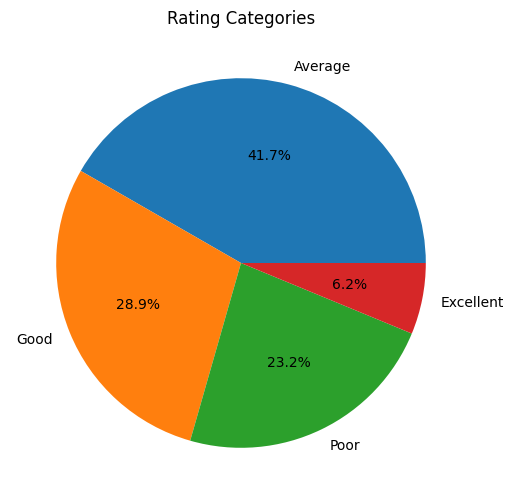

In [48]:
dfb['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Rating Categories')
plt.ylabel('')
plt.show()


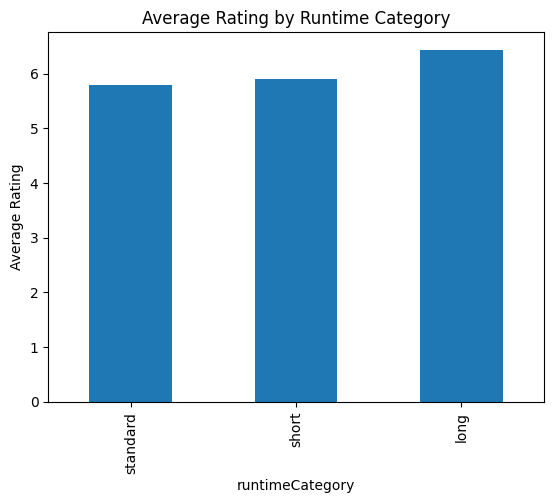

In [49]:
dfb.groupby('runtimeCategory')['averageRating'].mean().sort_values().plot.bar(
    title='Average Rating by Runtime Category', ylabel='Average Rating'
)
plt.show()


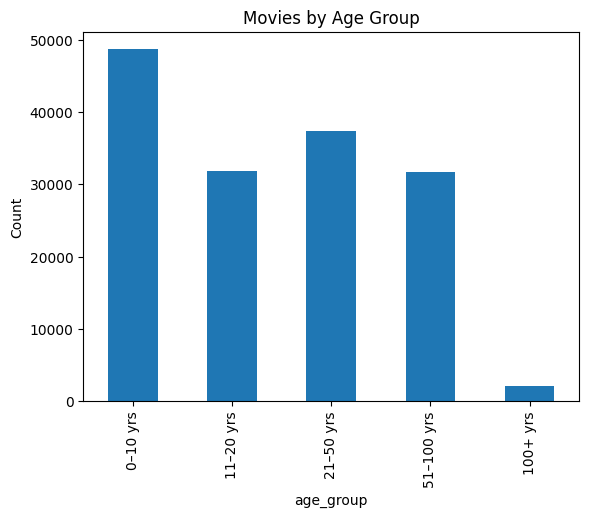

In [50]:
bins = [0, 10, 20, 50, 100, 150]
labels = ['0–10 yrs', '11–20 yrs', '21–50 yrs', '51–100 yrs', '100+ yrs']
dfb['age_group'] = pd.cut(dfb['movie_age'], bins=bins, labels=labels)

dfb['age_group'].value_counts().sort_index().plot.bar(
    title='Movies by Age Group', ylabel='Count'
)
plt.show()


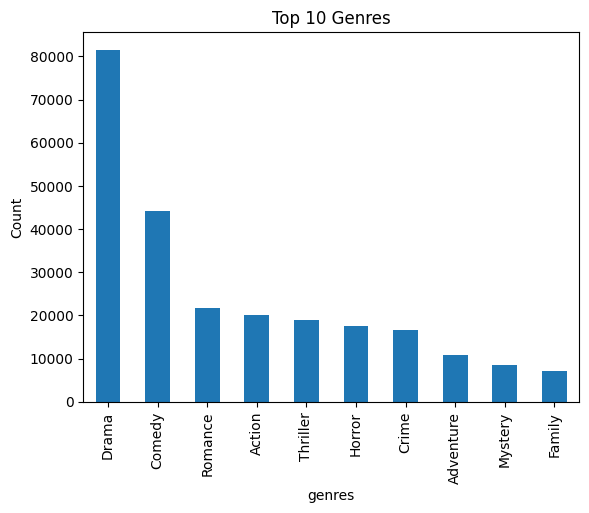

In [51]:
dfb['genres'].str.split(',').explode().value_counts().head(10).plot.bar(
    title='Top 10 Genres'
)
plt.ylabel('Count')
plt.show()


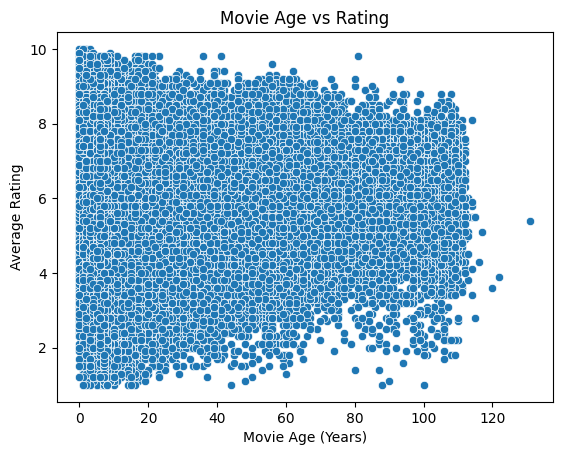

In [52]:
sns.scatterplot(data=dfb, x='movie_age', y='averageRating')
plt.title('Movie Age vs Rating')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Average Rating')
plt.show()


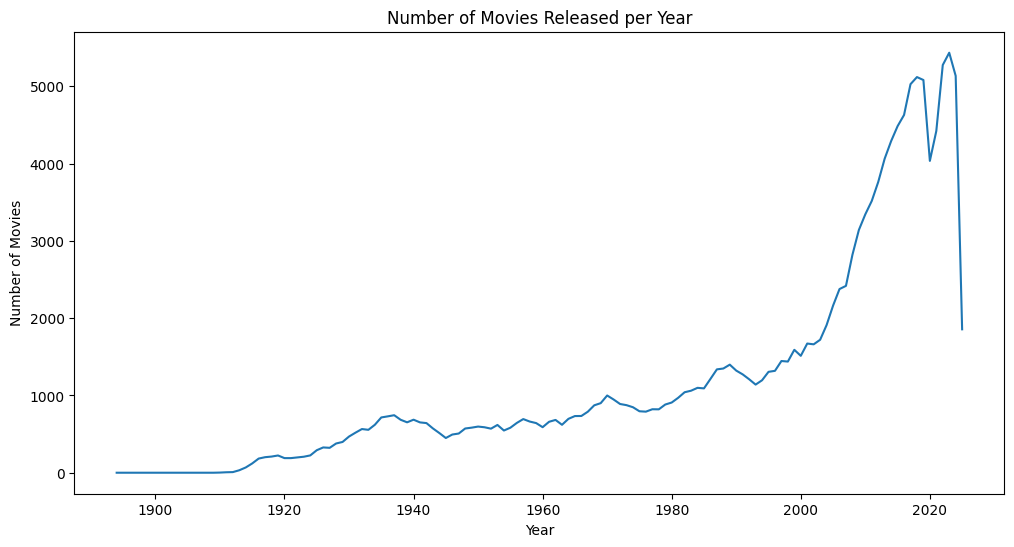

In [53]:
dfb['startYear'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


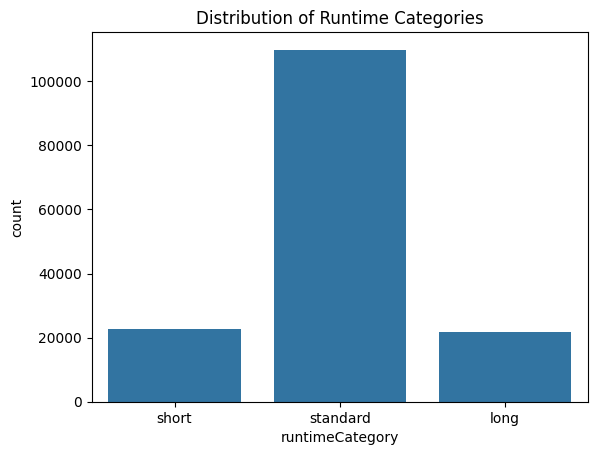

In [62]:
sns.countplot(data=dfb, x='runtimeCategory')
plt.title('Distribution of Runtime Categories')
plt.show()


In [65]:
dfb.sort_values(by='averageRating', ascending=False).head(10)[['primaryTitle', 'averageRating']]


primaryTitle  averageRating
104778         Sacred the Movie           10.0
120897                    Kirik           10.0
114270             One Decision           10.0
126605            Falsos Amigos           10.0
127299             Undocumented            9.9
117240          Branded by Fire            9.9
115737           A Summer Night            9.9
128594            Lottie's Girl            9.9
127801  The Night Before Easter            9.9
91377      Wolf Song: The Movie            9.9

## Superstar Actors

In [4]:
celebrity_path = r"C:\Users\LENOVO\Desktop\Datasets\Celebrity.csv"
forbes_path     = r"C:\Users\LENOVO\Desktop\Datasets\forbes_celebrity_100.csv"

df1 = pd.read_csv(celebrity_path)
df3= pd.read_csv(forbes_path)

In [5]:
df3.shape

(1647, 4)

In [6]:
df1.columns

Index(['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id',
       'known_for_department', 'adult'],
      dtype='object')

In [7]:
df3.columns

Index(['Name', 'Pay (USD millions)', 'Year', 'Category'], dtype='object')

In [8]:
print("Celebrity.csv Columns:", df1.columns.tolist())
print("Forbes Celebrity 100 Columns:", df3.columns.tolist())

print("\nSample from Celebrity.csv:")
print(df1.head())


print("\nSample from forbes_celebrity_100.csv:")
print(df3.head())


Celebrity.csv Columns: ['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id', 'known_for_department', 'adult']
Forbes Celebrity 100 Columns: ['Name', 'Pay (USD millions)', 'Year', 'Category']

Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  

Sample from forbes_celebrity_100.csv:
               Name  Pay (USD millions)  Year             Categor

In [9]:
df1.shape

(9980, 8)

In [10]:
print("\nSample from Celebrity.csv:")
print(df1.head())



Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  


In [11]:
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].unique()) 
    print(f"Total unique: {df1[col].nunique()}")



Column: Unnamed: 0
[   0    1    2 ... 9977 9978 9979]
Total unique: 9980

Column: name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8711

Column: original_name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8708

Column: popularity
[212.888 199.717 193.376 ...  21.939  21.938  21.937]
Total unique: 6923

Column: gender
[2 1 3 0]
Total unique: 4

Column: id
[    64  10859 115440 ...  78921   1384 114645]
Total unique: 8726

Column: known_for_department
['Acting' 'Directing' 'Writing' 'Production' 'Sound' 'Visual Effects'
 'Crew' 'Creator' 'Art' 'Camera' 'Costume & Make-Up' 'Editing']
Total unique: 12

Column: adult
[False]
Total unique: 1


In [12]:
df1.drop(columns=['Unnamed: 0', 'adult','gender','id'], inplace=True)
print(df1.head())


             name   original_name  popularity known_for_department
0     Gary Oldman     Gary Oldman     212.888               Acting
1   Ryan Reynolds   Ryan Reynolds     199.717               Acting
2  Sydney Sweeney  Sydney Sweeney     193.376               Acting
3   Jason Statham   Jason Statham     187.787               Acting
4   Chloe Coleman   Chloe Coleman     175.645               Acting


In [13]:
df1 = df1[df1['known_for_department'] == 'Acting'].reset_index(drop=True)


In [14]:
df1.shape

(9437, 4)

In [15]:
duplicate_names = df1['name'][df1['name'].duplicated(keep=False)]
df_duplicates = df1[df1['name'].isin(duplicate_names)]

name_mismatches = df1[df1['name'] != df1['original_name']]
df1 = df1.drop_duplicates().reset_index(drop=True)


In [16]:
print(df1.isna().sum())


name                    0
original_name           0
popularity              0
known_for_department    0
dtype: int64


In [17]:
diff_names = df1[df1['name'] != df1['original_name']]
print(diff_names[['name', 'original_name']].head())
print(f"Total differing entries: {len(diff_names)}")


           name original_name
5      Yoo Jung            유정
20    Zhao Lusi           赵露思
32           수지    Kim Soo-ji
36  Min Do-yoon           민도윤
55    Gal Gadot       גל גדות
Total differing entries: 2000


In [18]:
df1 = df1[df1['original_name'].apply(lambda x: isinstance(x, str) and x.isascii())].reset_index(drop=True)


In [19]:
english_name_pattern = re.compile(r'^[A-Za-z .\'\-]+$')
df1 = df1[
    df1['name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x))) &
    df1['original_name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x)))
].reset_index(drop=True)


In [20]:
df1 = df1[df1['name'] == df1['original_name']].reset_index(drop=True)


In [21]:
df1.shape

(5946, 4)

In [22]:
print("Max popularity:", df1['popularity'].max())
print("Min popularity:", df1['popularity'].min())


Max popularity: 212.888
Min popularity: 14.064


In [23]:
top_200 = df1.sort_values(by='popularity', ascending=False).head(150)
print(top_200[['name',  'popularity']])

                  name  popularity
0          Gary Oldman     212.888
1        Ryan Reynolds     199.717
2       Sydney Sweeney     193.376
3        Jason Statham     187.787
4        Chloe Coleman     175.645
..                 ...         ...
145  Samuel L. Jackson      73.183
146         Karl Urban      72.848
147       Blake Lively      72.748
148        Emma Watson      72.617
149     Robert De Niro      72.451

[150 rows x 2 columns]


In [24]:
popular_celebs = df1[df1['popularity'] > 90].sort_values(by='popularity', ascending=False)
display(popular_celebs[['name', 'original_name', 'popularity']])


name   original_name  popularity
0      Gary Oldman     Gary Oldman     212.888
1    Ryan Reynolds   Ryan Reynolds     199.717
2   Sydney Sweeney  Sydney Sweeney     193.376
3    Jason Statham   Jason Statham     187.787
4    Chloe Coleman   Chloe Coleman     175.645
..             ...             ...         ...
59  Dakota Johnson  Dakota Johnson      91.852
60     Ben Affleck     Ben Affleck      91.551
61   Anne Hathaway   Anne Hathaway      91.416
62   Mickey Rourke   Mickey Rourke      91.297
63     Liam Neeson     Liam Neeson      90.758

[64 rows x 3 columns]

In [25]:
print(df3.info())
print(df3.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1647 non-null   object 
 1   Pay (USD millions)  1647 non-null   float64
 2   Year                1647 non-null   int64  
 3   Category            1647 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 51.6+ KB
None
               Name  Pay (USD millions)  Year             Category
0     Oprah Winfrey               225.0  2005        Personalities
1       Tiger Woods                87.0  2005             Athletes
2        Mel Gibson               185.0  2005               Actors
3      George Lucas               290.0  2005  Directors/Producers
4  Shaquille O'Neal                33.4  2005             Athletes


In [26]:
df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])].reset_index(drop=True)


In [27]:
print(df3_filtered['Category'].value_counts())
print(df3_filtered)


Category
Actors       176
Actresses    107
Name: count, dtype: int64
                   Name  Pay (USD millions)  Year   Category
0            Mel Gibson               185.0  2005     Actors
1           Johnny Depp                37.0  2005     Actors
2            Tom Cruise                31.0  2005     Actors
3             Brad Pitt                25.0  2005     Actors
4            Will Smith                35.0  2005     Actors
..                  ...                 ...   ...        ...
278  Lin-Manuel Miranda                45.5  2020     Actors
279          Will Smith                44.5  2020     Actors
280        Adam Sandler                41.0  2020     Actors
281         Jackie Chan                40.0  2020     Actors
282      Angelina Jolie                35.5  2020  Actresses

[283 rows x 4 columns]


In [28]:
duplicated_names = df3_filtered[df3_filtered.duplicated(subset='Name', keep=False)]
name_counts = duplicated_names['Name'].value_counts()
print("Duplicated Names and Their Counts:")
print(name_counts)


Duplicated Names and Their Counts:
Name
Adam Sandler          14
Tom Cruise            13
Will Smith            11
Angelina Jolie        10
Jennifer Aniston      10
Robert Downey Jr.      9
Johnny Depp            9
Dwayne Johnson         9
Brad Pitt              9
Sandra Bullock         8
Cameron Diaz           8
Leonardo DiCaprio      8
Jackie Chan            7
Reese Witherspoon      7
Mark Wahlberg          6
Tom Hanks              6
Scarlett Johansson     6
Akshay Kumar           6
Vin Diesel             5
Meryl Streep           5
Ben Stiller            5
Julia Roberts          5
Ben Affleck            5
Nicole Kidman          5
Kristen Stewart        4
Matt Damon             4
George Clooney         4
Jennifer Lawrence      4
Alec Baldwin           4
Daniel Radcliffe       4
Drew Barrymore         3
Gwyneth Paltrow        3
Ashton Kutcher         3
Bradley Cooper         3
Zooey Deschanel        3
Melissa McCarthy       3
Salman Khan            3
Shah Rukh Khan         2
Nicolas Ca

In [29]:
df3_latest = df3_filtered.sort_values('Year', ascending=False).drop_duplicates(subset='Name', keep='first').reset_index(drop=True)
df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)

               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [30]:
df3_latest = df3_filtered.sort_values('Year', ascending=False) \
                         .drop_duplicates(subset='Name', keep='first') \
                         .reset_index(drop=True)

df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)


               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [31]:
names1 = df1['name'].dropna().str.lower().str.strip().drop_duplicates()
names3 = df3['Name'].dropna().str.lower().str.strip().drop_duplicates()


In [32]:
matched_names = set(names1) &set(names3)
print(f"Matched names: {len(matched_names)}")


Matched names: 142


In [33]:
df1 = df1[df1['name'].str.lower().str.strip().isin(matched_names)]
df3 = df3[df3['Name'].str.lower().str.strip().isin(matched_names)]


In [34]:
print(df1[['name', 'popularity']].sort_values(by='popularity', ascending=False))


                     name  popularity
1           Ryan Reynolds     199.717
5      Scarlett Johansson     152.879
9            Hugh Jackman     144.698
17         Channing Tatum     125.579
19            Johnny Depp     122.255
...                   ...         ...
5456        Oprah Winfrey      22.706
5513  Neil Patrick Harris      22.602
5762         Bette Midler      22.184
5779           Tim McGraw      22.174
5787        Jimmy Buffett      22.163

[142 rows x 2 columns]


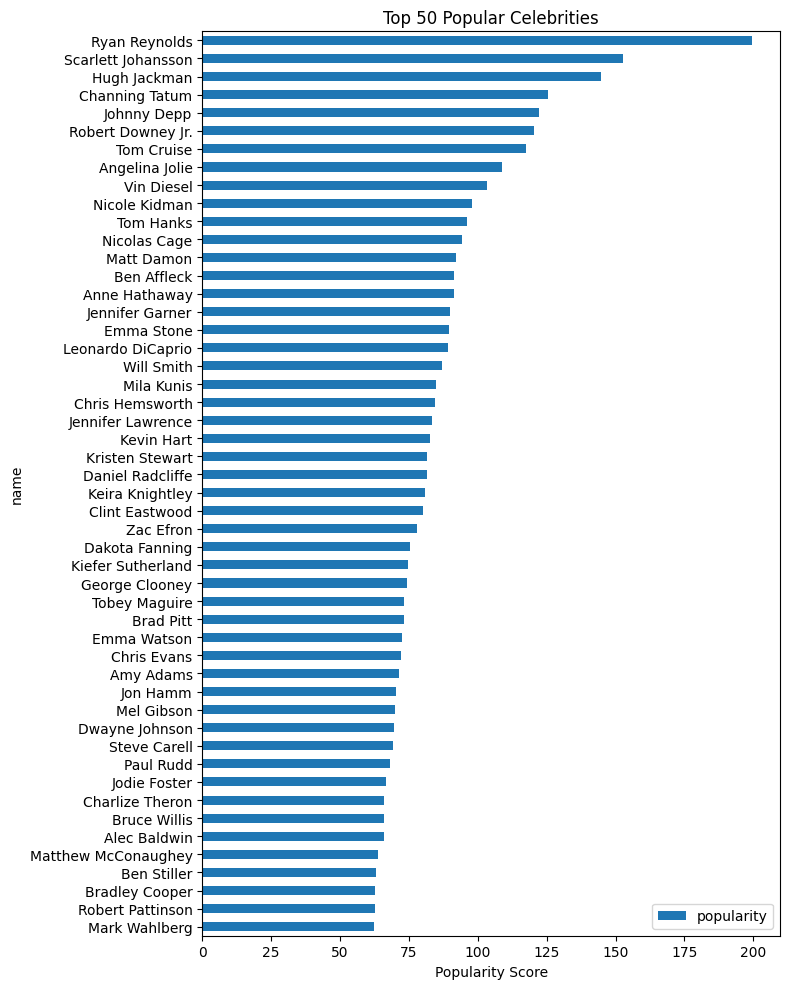

In [35]:
df1.sort_values(by='popularity', ascending=False).head(50).plot(
    x='name', y='popularity', kind='barh', figsize=(8, 10), title='Top 50 Popular Celebrities'
)
plt.gca().invert_yaxis() 
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()


In [36]:
df1['name_clean'] = df1['name'].str.lower().str.strip()
df3['name_clean'] = df3['Name'].str.lower().str.strip()

df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])]
merged_df = df1.merge(
    df3_filtered[['name_clean', 'Pay (USD millions)', 'Year', 'Category']],
    on='name_clean',
    how='inner'
)
merged_df = (
    merged_df.sort_values('Year', ascending=False)
             .drop_duplicates(subset='name', keep='first')
             .sort_values(by='Pay (USD millions)', ascending=False)
             .reset_index(drop=True)
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'Category']])


name  popularity  Pay (USD millions)   Category
0        George Clooney      74.270               239.0     Actors
1            Mel Gibson      70.105               185.0     Actors
2        Dwayne Johnson      69.724                87.5     Actors
3       Chris Hemsworth      84.653                76.4     Actors
4         Ryan Reynolds     199.717                71.5     Actors
5     Robert Downey Jr.     120.346                66.0     Actors
6         Harrison Ford      55.550                65.0     Actors
7         Mark Wahlberg      62.425                58.0     Actors
8        Bradley Cooper      62.768                57.0     Actors
9    Scarlett Johansson     152.879                56.0  Actresses
10          Ben Affleck      91.551                55.0     Actors
11           Matt Damon      92.266                55.0     Actors
12           Vin Diesel     103.428                54.0     Actors
13       Sandra Bullock      61.578                51.0  Actresses
14         Akshay Kumar      36.724                48.5     Actors
15          Johnny Depp     122.255                48.0     Actors
16    Jennifer Lawrence      83.381                46.0  Actresses
17   Lin-Manuel Miranda      23.672                45.5     Actors
18           Will Smith      87.129                44.5     Actors
19          Chris Evans      72.136                43.5     Actors
20           Tom Cruise     117.683                43.0     Actors
21            Paul Rudd      68.149                41.0     Actors
22         Adam Sandler      50.735                41.0     Actors
23         Bruce Willis      65.908                41.0     Actors
24         Nicolas Cage      94.236                40.0     Actors
25       Shah Rukh Khan      47.297                38.0     Actors
26    Denzel Washington      61.837                38.0     Actors
27          Salman Khan      41.430                37.7     Actors
28       Angelina Jolie     108.613                35.5  Actresses
29     Amitabh Bachchan      29.697                33.5     Actors
30     Melissa McCarthy      39.824                33.0  Actresses
31          Ben Stiller      63.039                33.0     Actors
32        Tobey Maguire      73.316                32.0     Actors
33      Keira Knightley      80.972                32.0  Actresses
34            Brad Pitt      73.232                31.5     Actors
35     Jennifer Aniston      50.750                31.0  Actresses
36    Leonardo DiCaprio      89.326                29.0     Actors
37       Channing Tatum     125.579                29.0     Actors
38         Jodie Foster      66.674                27.0  Actresses
39            Tom Hanks      96.047                26.0     Actors
40       Ashton Kutcher      38.540                26.0     Actors
41       Taylor Lautner      35.438                26.0     Actors
42     Daniel Radcliffe      81.500                25.0     Actors
43         Vince Vaughn      48.877                25.0     Actors
44      Kristen Stewart      81.568                22.0  Actresses
45  Matthew McConaughey      63.916                21.0     Actors
46     Robert Pattinson      62.649                20.0     Actors
47      Gwyneth Paltrow      36.382                19.0  Actresses
48         Hugh Jackman     144.698                18.0     Actors
49         Cameron Diaz      62.099                18.0  Actresses
50        Julia Roberts      42.791                16.0  Actresses
51          Halle Berry      56.924                16.0  Actresses
52           Emma Stone      89.486                16.0  Actresses
53      Charlize Theron      66.007                15.0  Actresses
54       Drew Barrymore      47.119                15.0  Actresses
55            Amy Adams      71.241                13.0  Actresses
56       Cate Blanchett      41.866                12.0  Actresses
57          Naomi Watts      55.024                11.5  Actresses
58           Mila Kunis      84.672                11.0  Actresses

In [37]:
df3.shape

(524, 5)

In [38]:
merged_df['is_superstar'] = True


In [39]:
display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'is_superstar']])


name  popularity  Pay (USD millions)  is_superstar
0        George Clooney      74.270               239.0          True
1            Mel Gibson      70.105               185.0          True
2        Dwayne Johnson      69.724                87.5          True
3       Chris Hemsworth      84.653                76.4          True
4         Ryan Reynolds     199.717                71.5          True
5     Robert Downey Jr.     120.346                66.0          True
6         Harrison Ford      55.550                65.0          True
7         Mark Wahlberg      62.425                58.0          True
8        Bradley Cooper      62.768                57.0          True
9    Scarlett Johansson     152.879                56.0          True
10          Ben Affleck      91.551                55.0          True
11           Matt Damon      92.266                55.0          True
12           Vin Diesel     103.428                54.0          True
13       Sandra Bullock      61.578                51.0          True
14         Akshay Kumar      36.724                48.5          True
15          Johnny Depp     122.255                48.0          True
16    Jennifer Lawrence      83.381                46.0          True
17   Lin-Manuel Miranda      23.672                45.5          True
18           Will Smith      87.129                44.5          True
19          Chris Evans      72.136                43.5          True
20           Tom Cruise     117.683                43.0          True
21            Paul Rudd      68.149                41.0          True
22         Adam Sandler      50.735                41.0          True
23         Bruce Willis      65.908                41.0          True
24         Nicolas Cage      94.236                40.0          True
25       Shah Rukh Khan      47.297                38.0          True
26    Denzel Washington      61.837                38.0          True
27          Salman Khan      41.430                37.7          True
28       Angelina Jolie     108.613                35.5          True
29     Amitabh Bachchan      29.697                33.5          True
30     Melissa McCarthy      39.824                33.0          True
31          Ben Stiller      63.039                33.0          True
32        Tobey Maguire      73.316                32.0          True
33      Keira Knightley      80.972                32.0          True
34            Brad Pitt      73.232                31.5          True
35     Jennifer Aniston      50.750                31.0          True
36    Leonardo DiCaprio      89.326                29.0          True
37       Channing Tatum     125.579                29.0          True
38         Jodie Foster      66.674                27.0          True
39            Tom Hanks      96.047                26.0          True
40       Ashton Kutcher      38.540                26.0          True
41       Taylor Lautner      35.438                26.0          True
42     Daniel Radcliffe      81.500                25.0          True
43         Vince Vaughn      48.877                25.0          True
44      Kristen Stewart      81.568                22.0          True
45  Matthew McConaughey      63.916                21.0          True
46     Robert Pattinson      62.649                20.0          True
47      Gwyneth Paltrow      36.382                19.0          True
48         Hugh Jackman     144.698                18.0          True
49         Cameron Diaz      62.099                18.0          True
50        Julia Roberts      42.791                16.0          True
51          Halle Berry      56.924                16.0          True
52           Emma Stone      89.486                16.0          True
53      Charlize Theron      66.007                15.0          True
54       Drew Barrymore      47.119                15.0          True
55            Amy Adams      71.241                13.0          True
56       Cate Blanchett      

In [43]:
merged_df.shape

(73, 9)

In [42]:
merged_df.columns

Index(['name', 'original_name', 'popularity', 'known_for_department',
       'name_clean', 'Pay (USD millions)', 'Year', 'Category', 'is_superstar'],
      dtype='object')

In [100]:
merged_df[['name', 'popularity', 'Pay (USD millions)', 'is_superstar']].to_csv('superstars_actors.csv', index=False)


In [2]:
superstars = r"C:\Users\LENOVO\Desktop\Datasets\superstars_actors.csv"
df1 = pd.read_csv(superstars)

In [3]:
df1.shape

(73, 4)

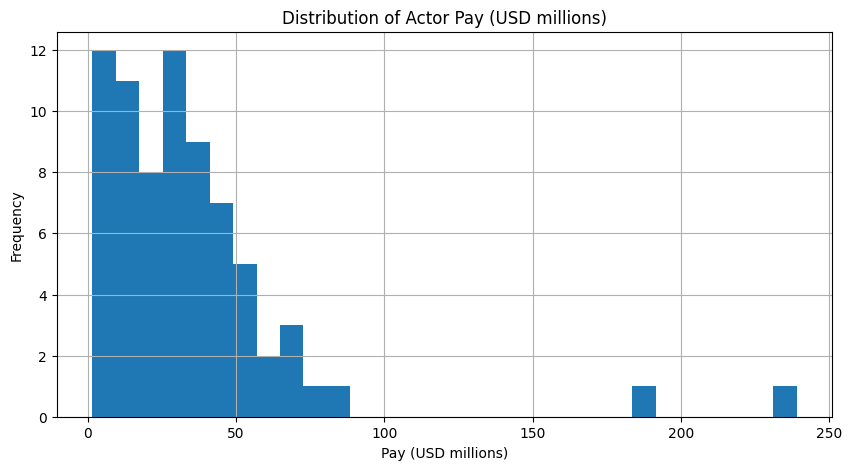

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_df['Pay (USD millions)'], bins=30)
plt.title('Distribution of Actor Pay (USD millions)')
plt.xlabel('Pay (USD millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [107]:
merged_df.nlargest(10, 'Pay (USD millions)')[['name', 'Pay (USD millions)', 'popularity']]


name  Pay (USD millions)  popularity
0      George Clooney               239.0      74.270
1          Mel Gibson               185.0      70.105
2      Dwayne Johnson                87.5      69.724
3     Chris Hemsworth                76.4      84.653
4       Ryan Reynolds                71.5     199.717
5   Robert Downey Jr.                66.0     120.346
6       Harrison Ford                65.0      55.550
7       Mark Wahlberg                58.0      62.425
8      Bradley Cooper                57.0      62.768
9  Scarlett Johansson                56.0     152.879